In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, ttest_ind_from_stats , f_oneway # Numeric Vs Categorical
from scipy.stats import chi2_contingency

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, ttest_ind_from_stats , f_oneway # Numeric Vs Categorical
from scipy.stats import chi2_contingency

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, ttest_ind_from_stats , f_oneway # Numeric Vs Categorical
from scipy.stats import chi2_contingency

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind, ttest_ind_from_stats , f_oneway # Numeric Vs Categorical
from scipy.stats import chi2_contingency

In [92]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Shape of the data

In [93]:
print(f" rows: {df.shape[0]} \n columns: {df.shape[1]}")

 rows: 10886 
 columns: 12


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


#There are no null values in the dataset

In [95]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [96]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [97]:
cat_cols= ['season', 'holiday', 'workingday', 'weather']
df[cat_cols].melt().groupby(['variable', 'value'])[['value']].count()

value
variable   value       
holiday    0      10575
           1        311
season     1       2686
           2       2733
           3       2733
           4       2734
weather    1       7192
           2       2834
           3        859
           4          1
workingday 0       3474
           1       7412

# Uni-variate analysis

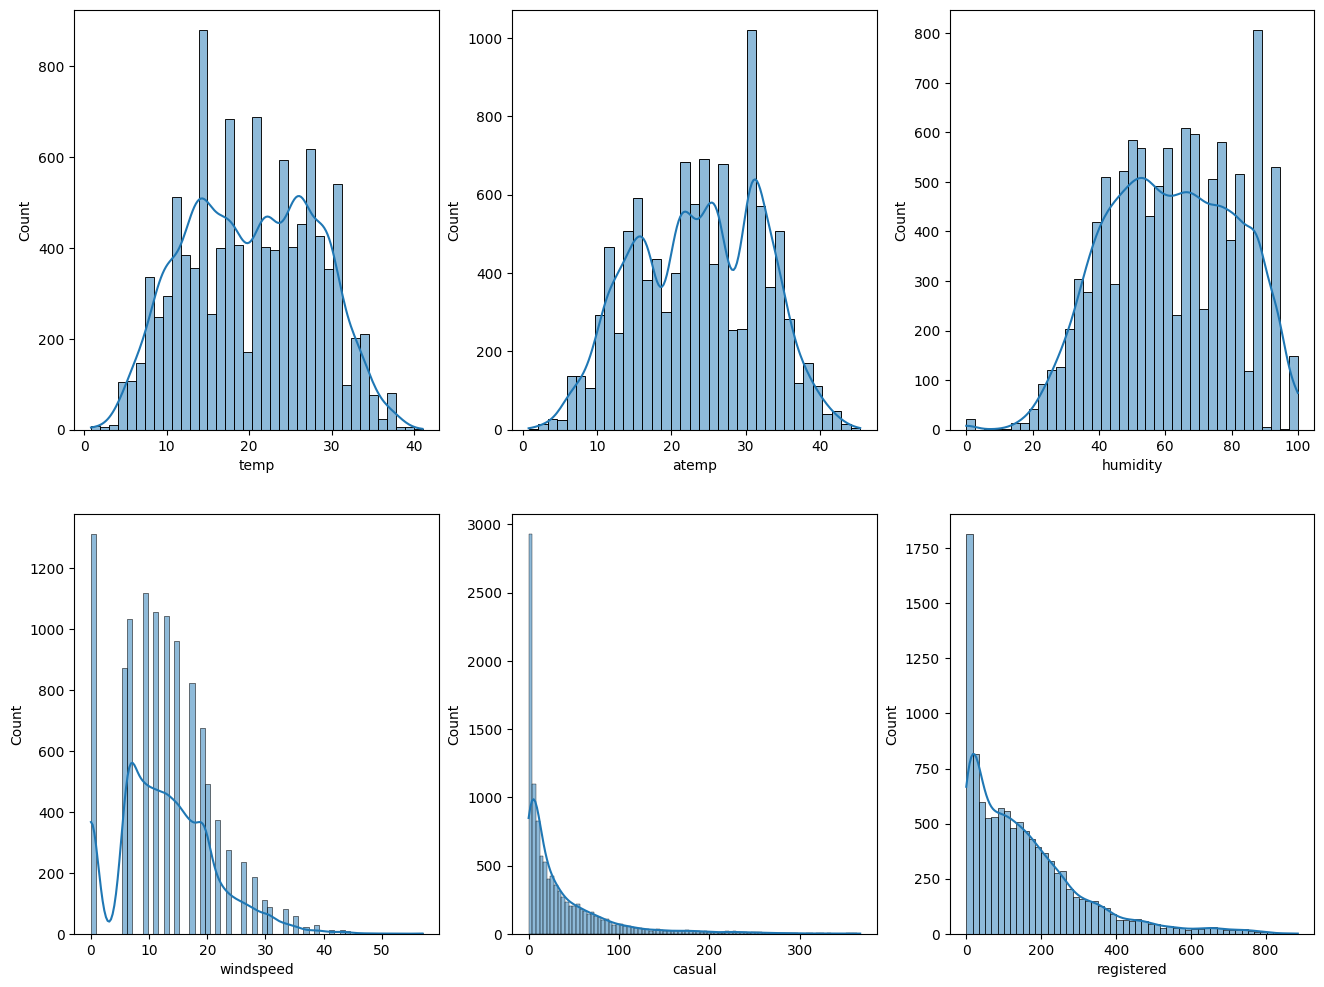

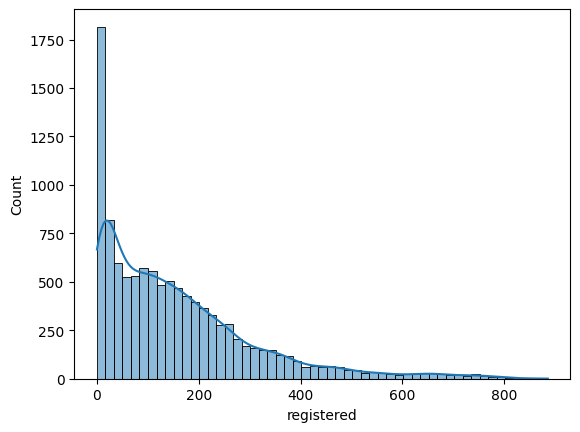

In [98]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(3):
        sns.histplot(df[num_cols[index]], ax=axis[row, col], kde=True)
        index += 1
        
plt.show()
sns.histplot(df[num_cols[-1]], kde=True) 
plt.show()

#temp,atemp & humidity show normal distribution

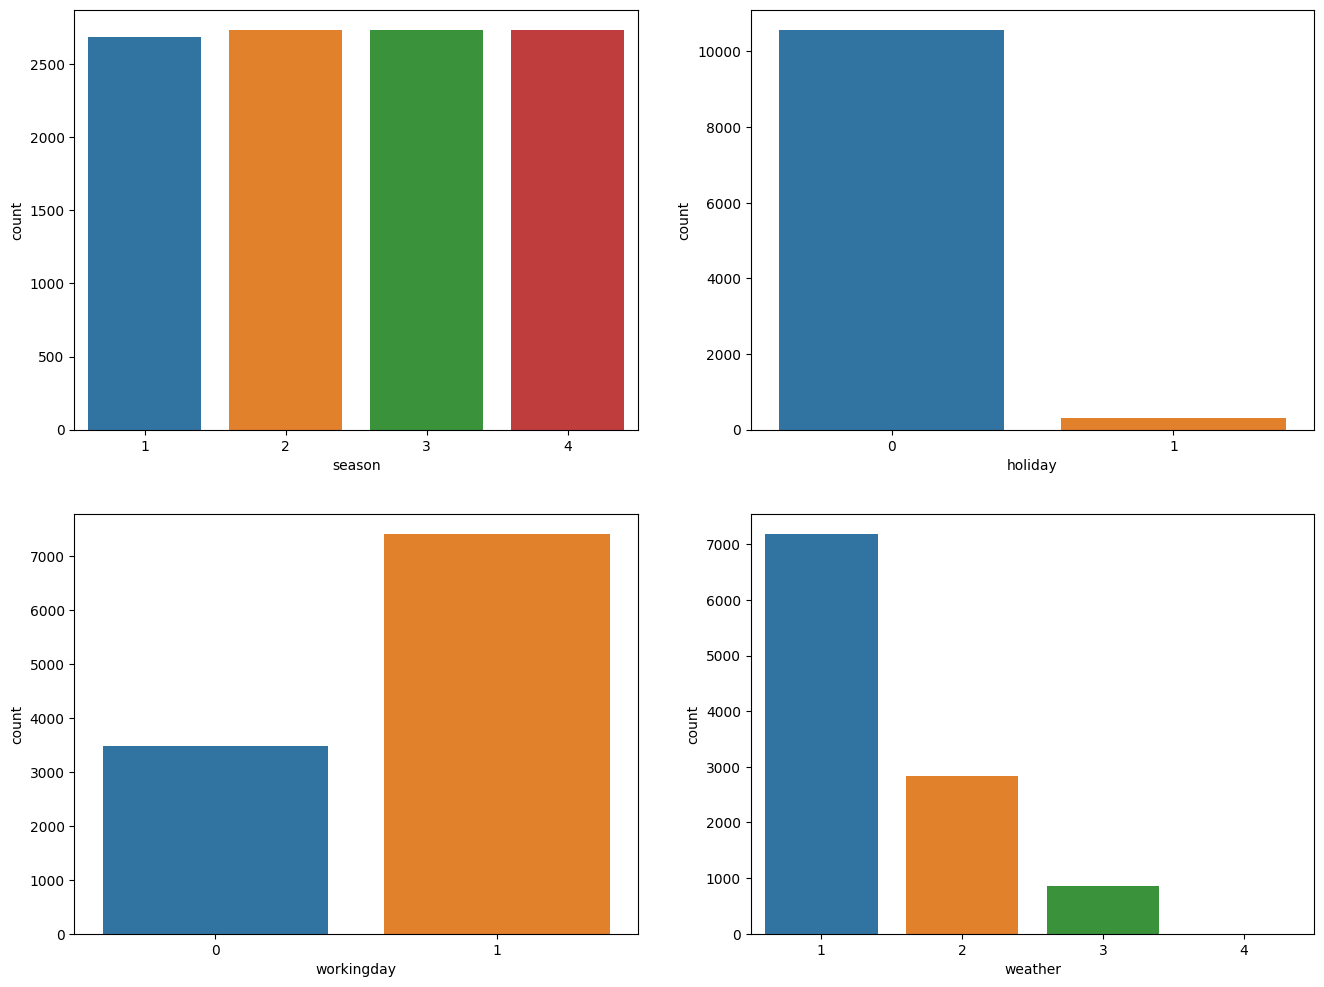

In [99]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.countplot(data=df, x=cat_cols[index], ax=axis[row, col])
        index += 1
        
plt.show()

#From the above plots we observe that ,
#Whenever its a holiday more bikes are rented.
#It is also clear from the workingday also that whenever day is holiday or weekend, slightly more bikes were rented.
#Whenever there is rain, thunderstorm, snow or fog, there were less bikes were rented

In [100]:
df.skew()

C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_20800\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_20800\3276592671.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


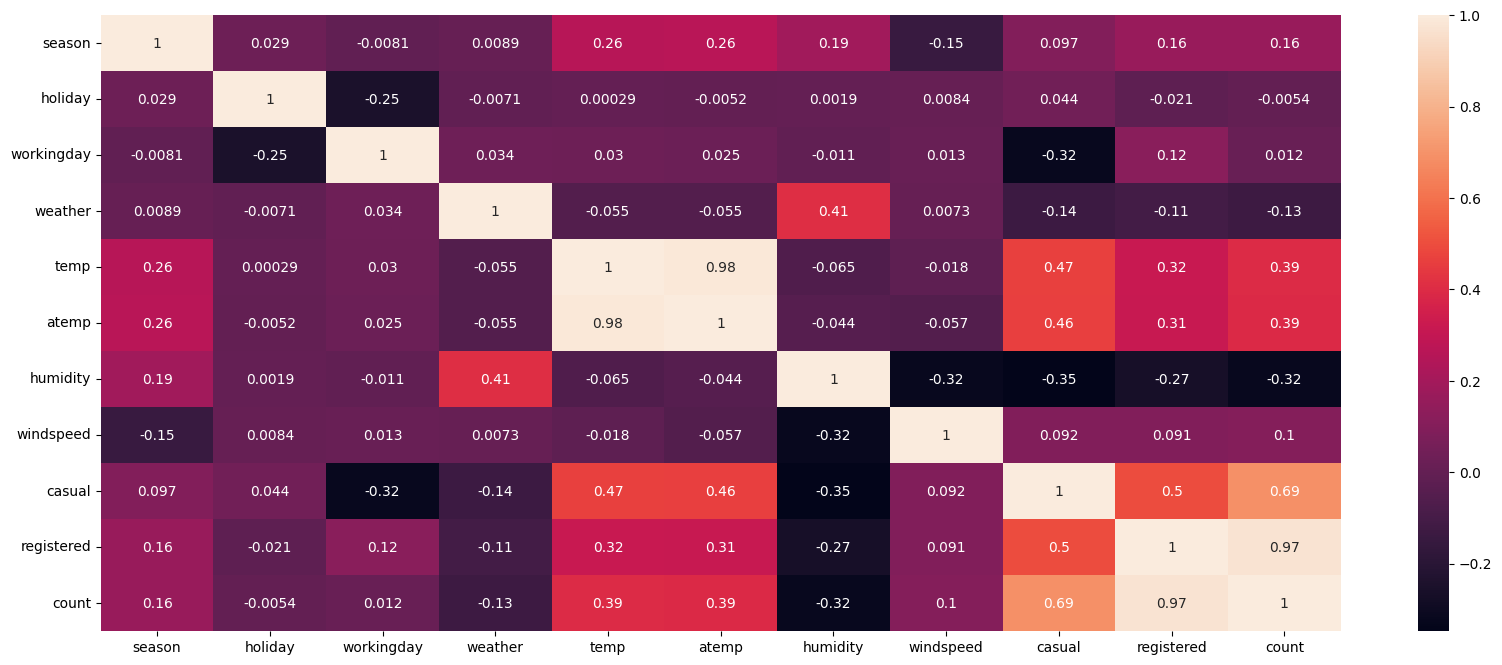

In [101]:
plt.figure(figsize=[20,8])
sns.heatmap(df.corr(), annot=True)
plt.show()

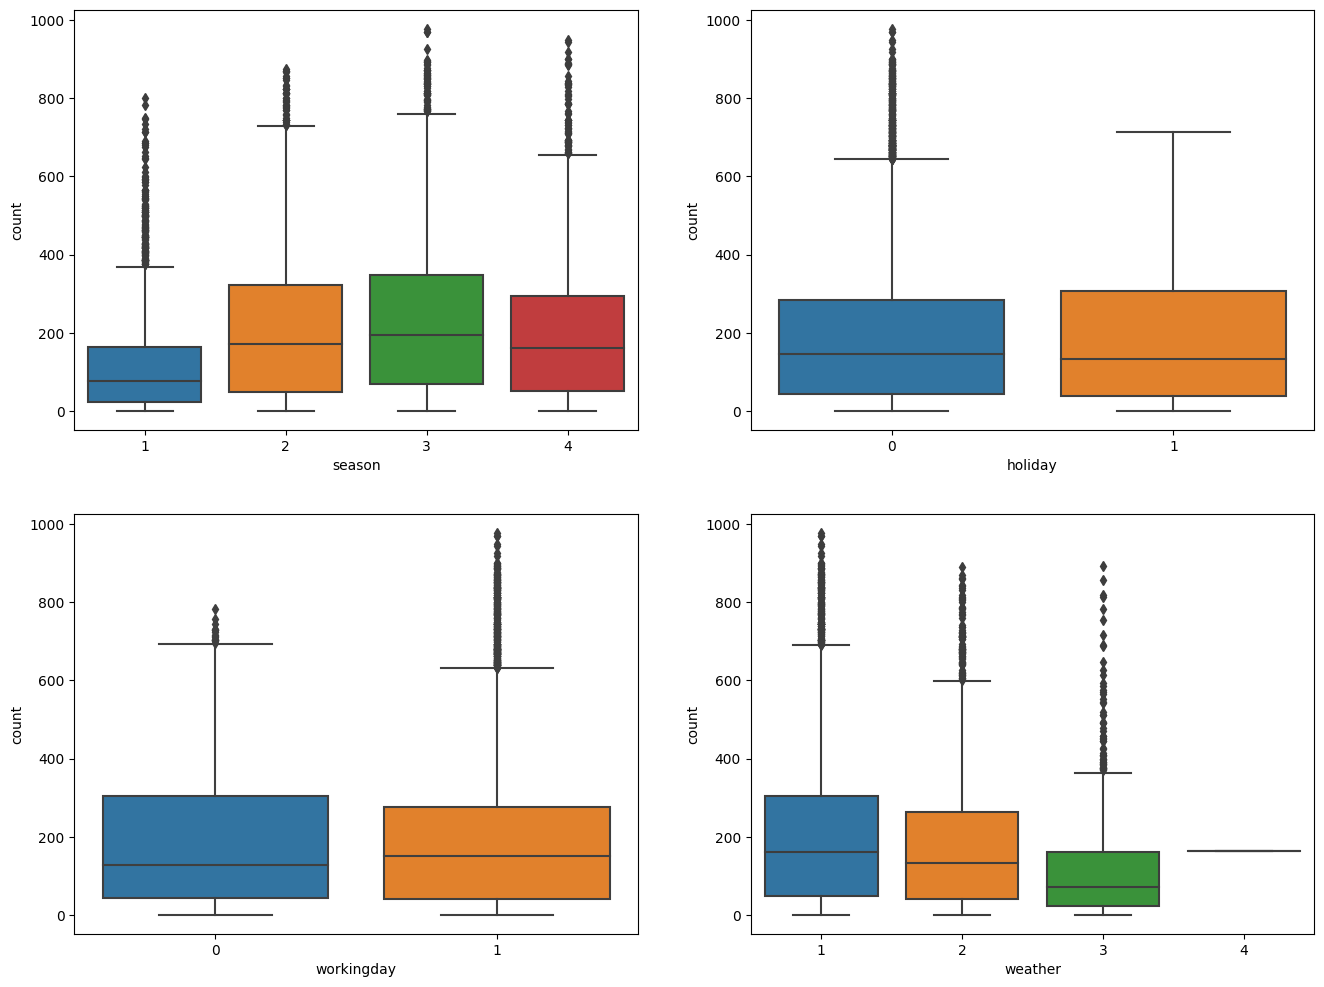

In [102]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

index = 0
for row in range(2):
    for col in range(2):
        sns.boxplot(data=df, x=cat_cols[index], y='count', ax=axis[row, col])
        index += 1
        
plt.show()

# We are using t-test to predict whether we can conclude that the working days have an impact on cycle rented.

In [103]:
working_day= df[df['workingday']==0]['count']
working_day

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

In [104]:
non_working_day= df[df['workingday']==1]['count']
non_working_day


47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

#ho = working days do not  have impact on the cycle rented
#h1 = working days have impact on the cycle rented
  

In [105]:
t_test_stat, p_value = ttest_ind(working_day, non_working_day)
print(t_test_stat,p_value)

-1.2096277376026694 0.22644804226361348


#From the test we dont have sufficient data to confirm that the working days create an impact on the cycles rented

# We are using anova to test to predict whether the number of cycle rented is similar or different in different season

In [106]:
season=[1,2,3,4]
S=['0','spring','summer','fall','winter']
for i in range(5):
    season=df[df['season']==i]['count']
    print(f"The cycle rented during {S[i]} :" ,season.mean())

The cycle rented during 0 : nan
The cycle rented during spring : 116.34326135517499
The cycle rented during summer : 215.25137211855105
The cycle rented during fall : 234.417124039517
The cycle rented during winter : 198.98829553767374


#The cycle rented during fall & summer is almost same . The cycle rented during spring is lesser

#ho = Cycle rented during different season is similar
#h1 = cycle rented during different season is different

In [107]:
spring = df[df['season']==1]['count']
summer =df[df['season']==2]['count']
fall = df[df['season']==3]['count']
winter = df[df['season']==4]['count']

In [108]:
f_oneway(spring, summer, fall,winter)

F_onewayResult(statistic=236.94671081032106, pvalue=6.164843386499654e-149)

#The p value is less than 0.05 that we can reject null hypothesis and hence Cycle rented during different season is different

In [109]:
cloudy = df[df['weather']==1]['count']
mist =df[df['weather']==2]['count']
snow = df[df['weather']==3]['count']
Heavy_rain = df[df['weather']==4]['count']

In [110]:
f_oneway(cloudy, mist, snow,Heavy_rain)

F_onewayResult(statistic=65.53024112793271, pvalue=5.482069475935669e-42)

#The p value is less than 0.05 that we can reject null hypothesis and hence Cycle rented during different weather is different

# we can interpret whether the mean values of cycle rented during summer & fall is same or different

#ho= the cycle rented during summer & fall is not similar
#h1=the cycle rented during summer & fall is similar

In [111]:
ttest_ind(summer, fall)

Ttest_indResult(statistic=-3.6407918229052068, pvalue=0.00027431561172498644)

#we reject ho and we can conclude from the data that cycle rented during summer & fall is similar

# To check whether the Weather is dependent on season

In [112]:
season_weather = pd.crosstab(index=df['season'],columns=['weather'])
season_weather

col_0,weather
season,
1,2686
2,2733
3,2733
4,2734


#h0= weather is independent of the season
#h1= weather is dependent of the season

In [113]:
chi2_contingency(season_weather)

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[2686.],
       [2733.],
       [2733.],
       [2734.]]))

#Since p value is greater we dont reject ho and hence weather is independent of the season

In [114]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [135]:
tot_casual = df['casual'].sum()
print(tot_casual)
tot_registered = df['registered'].sum()
print(tot_registered)

392135
1693341


([<matplotlib.patches.Wedge at 0x241ba2e1e50>,
 [Text(0.9135950190480542, 0.6126533613476594, 'casual'),
  Text(-0.9135950477284269, -0.6126533185791891, 'Registered')],
 [Text(0.4983245558443931, 0.3341745607350869, '18.80'),
  Text(-0.49832457148823284, -0.3341745374068304, '81.20')])

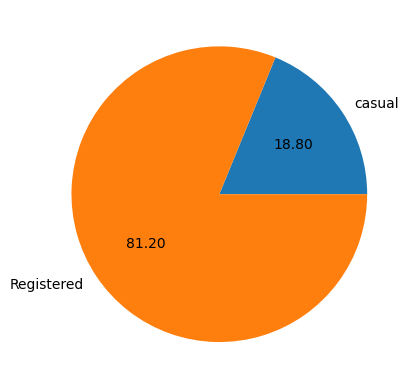

In [176]:
y=np.array([tot_casual,tot_registered])
plt.pie(y,labels=['casual','Registered'],autopct="%.2f")

# Here we observed that the yulu cycles are rented mostly by the registered users

In [163]:
df.groupby('workingday')['registered','casual'].mean()

C:\Users\dhAmo~\AppData\Local\Temp\ipykernel_20800\4068166912.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('workingday')['registered','casual'].mean()


,registered,casual
workingday,,
0,129.198330,59.308290
1,167.904209,25.107663


# The mean of the registered users is high on holidays
# The mean of the casual users is high on working days

In [171]:
working_reg= df[df["workingday"]==1]["registered"]
working_cas= df[df["workingday"]==1]["casual"]
non_working_reg= df[df["workingday"]==0]["registered"]
non_working_cas= df[df["workingday"]==0]["casual"]


#h0=The mean of the registered users is not high on holidays
#h1= The mean of the registered users is high on holidays

In [174]:
ttest_ind(working_reg, non_working_reg)

Ttest_indResult(statistic=12.552707000266874, pvalue=6.806493719916074e-36)

# h0=The mean of the casual users is not high on holidays
# h1= The mean of the casual  users is high on holidays

In [175]:
ttest_ind(working_cas, non_working_cas)

Ttest_indResult(statistic=-35.12830185964087, pvalue=3.5619674236054405e-256)

# From the above observation we can conclude that we have enough data to say The mean of the registered users is high on holidays & The mean of the casual  users is high on working days